In [1]:
import pandas as pd
import joblib

# Load model, scaler, threshold
model = joblib.load("../models/fraud_model.pkl")
scaler = joblib.load("../models/scaler.pkl")

# Load raw data
df = pd.read_csv("../data/creditcard.csv")


In [2]:
fraud_df = df[df["Class"] == 1].drop("Class", axis=1)
fraud_df.shape


(492, 30)

In [3]:
fraud_scaled = scaler.transform(fraud_df)


In [4]:
fraud_probs = model.predict_proba(fraud_scaled)[:,1]


In [5]:
import numpy as np

print("Min:", fraud_probs.min())
print("Mean:", fraud_probs.mean())
print("Median:", np.median(fraud_probs))
print("Max:", fraud_probs.max())


Min: 0.004580900142031257
Mean: 0.8831577701253424
Median: 0.9795745003847084
Max: 0.9996037736820564


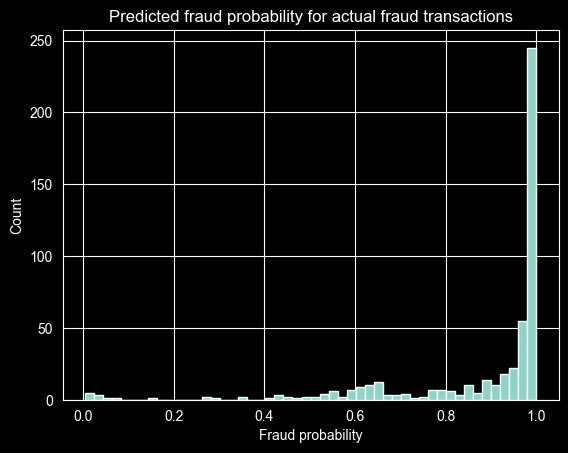

In [6]:
import matplotlib.pyplot as plt

plt.hist(fraud_probs, bins=50)
plt.title("Predicted fraud probability for actual fraud transactions")
plt.xlabel("Fraud probability")
plt.ylabel("Count")
plt.show()


In [7]:
threshold = joblib.load("../models/threshold.pkl")

below = (fraud_probs < threshold).sum()
above = (fraud_probs >= threshold).sum()

below, above


(np.int64(4), np.int64(488))